# Assignment 6: Clustering
This assignmnet will give you a chance to play with some of the unsupervized learning algorithms in scikit-learn, as well as implement a simple clustering algorithm yourself.

In [1]:
import numpy as np

# import sklearn stuff
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
# set up for plotting as interactive figures in the notebook
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt, mpld3
import matplotlib.patches as mpatches
import codecs, json
#reference links : http://madhugnadig.com/articles/machine-learning/2017/03/04/implementing-k-means-clustering-from-scratch-in-python.html

## Load some data
Once again, we'll start with the iris dataset, and then apply PCA to project it down to 2 dimensions

In [2]:
# load the iris dataset
iris = datasets.load_iris()
print(iris.data)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [3]:
# set up a PCA learner
pca = PCA(n_components = 2)
# actually run the fit algorithm
eigenbasis = pca.fit(iris.data)
# transform our data using the learned transform
iris2d = eigenbasis.transform(iris.data)

# Clustering
Another form of unsupervised learning is clustering.  Let's try running the k-means clustering algorithm on our data, and then plotting the results to see how it looks.  Note that since we're doing unsupervised learning, the algorithm doesn't get the labels (and so there's no point in having a train/test split).

In [4]:
# set the number of clusters to 3
clusters = KMeans(n_clusters=3)
# run the algorithm 
clusters.fit(iris.data)
# let's look at the cluster assignments:
clusters.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

<IPython.core.display.Javascript object>


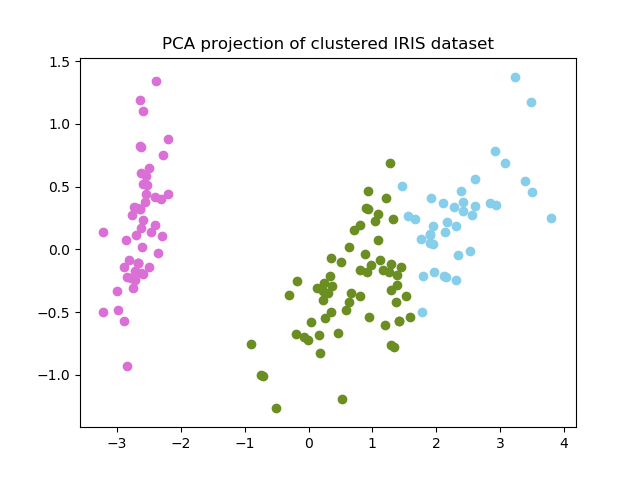

<IPython.core.display.Javascript object>


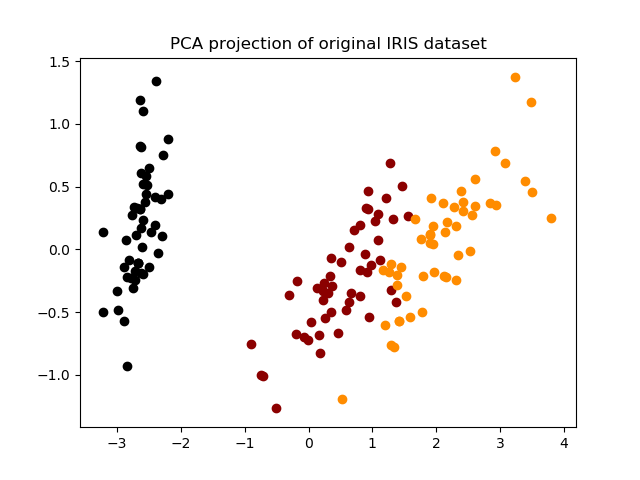

Text(0.5,1,'PCA projection of original IRIS dataset')

In [5]:
# now let's plot our data using cluster assignment rather than "true" class label.
# we'll use the PCA projection for visualization purposes, even though we did our
# clustering in the original 4-dimensional data space
plt.figure()
colors = ['skyblue', 'orchid', 'olivedrab']

for i in range(len(iris2d)):
    plt.scatter(iris2d[i][0], iris2d[i][1], color=colors[clusters.labels_[i]])
plt.title('PCA projection of clustered IRIS dataset')

    
# sice we do have real class labels, we might also want to plot those,
# so we can see how well the clustering matches up with the real labels
plt.figure()
colors2 = ['black', 'darkred', 'darkorange']

for i in range(len(iris2d)):
    plt.scatter(iris2d[i][0], iris2d[i][1], color=colors2[iris.target[i]])

plt.title('PCA projection of original IRIS dataset')

## Or we can combine them into a single plot
If we want one plot, we can't really use color for both, since then it will be hard to tell the difference.   However, if we use color for one plot and then shape for the other, we can see what's going on.  Here, we'll use color for original class label, and then overlay shapes based on cluster label.

<IPython.core.display.Javascript object>


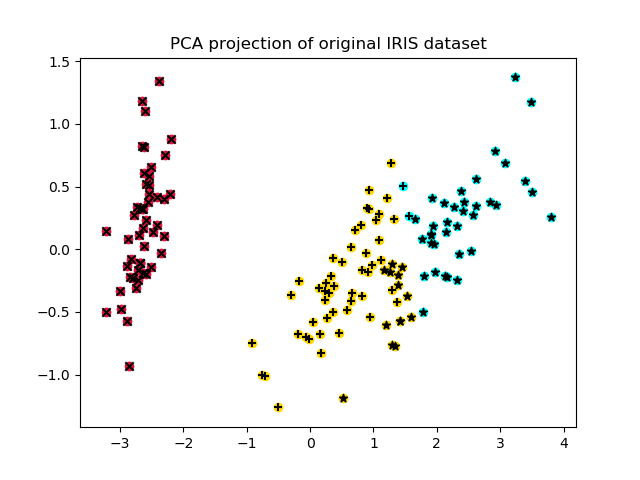

Text(0.5,1,'PCA projection of original IRIS dataset')

In [6]:
plt.figure()

colors = ['cyan', 'crimson', 'gold']
for i in range(len(iris2d)):
    plt.scatter(iris2d[i][0], iris2d[i][1], color=colors[clusters.labels_[i]])

markers = ['x', '+', '*']
#markers = [9, 10, 11]
for i in range(len(iris2d)):
    plt.scatter(iris2d[i][0], iris2d[i][1], marker=markers[iris.target[i]], color='black')

plt.title('PCA projection of original IRIS dataset')

# What do you notice?
Explain what you can conclude from examining these plots.

*** As we know from clustering, It is a task of grouping a set of objects in such a way that the objects in the same group are similar to each other than to those in other groups.
The first PCA projection of clustered-iris data and PCA projection of original iris data both depict same plot. The clustered data is divided into 3 clusters as per our requirement. The original iris data also has 3 different class labels so, we see 3 different groups on the plot. 
As both the plots were depicting the same points, they are overlappped when we changed the shape of the original iris data.

_todo: answer_

# Gaussian Mixture Model
We can use a Gaussian mixture either as a way of modeling a "distribution," or as a type of clustering algorithm (we're doing the same operation, we're just interpreting the results slightly differently).



In [7]:
gmm = GaussianMixture(n_components = 3, covariance_type = 'full')
gmm.fit(iris.data)
# the "means" are like cluster centers
print('means:\n', gmm.means_, '\n')
# the "covariances" define the "shape" of the clusters
print('covariances:\n', gmm.covariances_)

means:
 [[6.54639415 2.94946365 5.48364578 1.98726565]
 [5.006      3.418      1.464      0.244     ]
 [5.9170732  2.77804839 4.20540364 1.29848217]] 

covariances:
 [[[0.38744093 0.09223276 0.30244302 0.06087397]
  [0.09223276 0.11040914 0.08385112 0.05574334]
  [0.30244302 0.08385112 0.32589574 0.07276776]
  [0.06087397 0.05574334 0.07276776 0.08484505]]

 [[0.121765   0.098292   0.015816   0.010336  ]
  [0.098292   0.142277   0.011448   0.011208  ]
  [0.015816   0.011448   0.029505   0.005584  ]
  [0.010336   0.011208   0.005584   0.011265  ]]

 [[0.2755171  0.09662295 0.18547072 0.05478901]
  [0.09662295 0.09255152 0.09103431 0.04299899]
  [0.18547072 0.09103431 0.20235849 0.06171383]
  [0.05478901 0.04299899 0.06171383 0.03233775]]]


### Visualizing mixture models
Since we don't have "hard" cluster assignments, we can't use the same kind of plot as before.  Instead, let's try to plot the ellipsoids for each mixture component; this example is adapted from http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_covariances.html

It's not required for the assignment, but it's a good exercise to figure out how to adapt this code to display other pairs of axes (or, if you really want a challenge, try to plot the projection of the Gaussians into the basis we got from PCA)

<IPython.core.display.Javascript object>


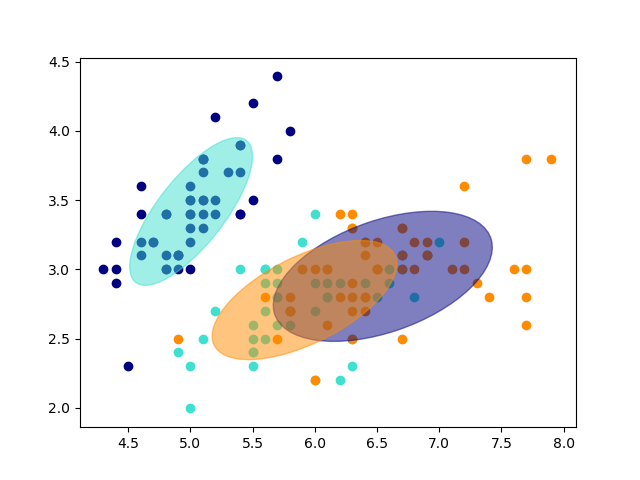

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
colors = ['navy', 'turquoise', 'darkorange']
# yet another fancy python way to scatterplot the data; here we're back to using the first 2 dimensions
for n, color in enumerate(colors):
        data = iris.data[iris.target == n]
        plt.scatter(data[:,0], data[:,1], color=color,
                    label=iris.target_names[n])

# now we'll plot some ellipses based on the first two dimensions of the Gaussians        
for n, color in enumerate(colors):
    covariances = gmm.covariances_[n][:2, :2]
    v, w = np.linalg.eigh(covariances)
    u = w[0] / np.linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi  # convert to degrees
    v = 2. * np.sqrt(2.) * np.sqrt(v)
    ell = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                              180 + angle, color=color)
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)

# Synthetic data
One useful way of examining the behavior of different algorithms is to use "synthetic data," or data we've created algorithmically.  In this case, we can create a set of random "clusters" and then modify them to let us see how K-means and Gaussian Mixtures behave.  This example is based on the one at (http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py), though it has been very heavily modified.

First, we'll generate some data:

In [9]:
# generate a set of round blobs; we ask for 5 clusters, a total of 200 data points, 
# each with 2 features (so we can plot them easily)
(X, y) = datasets.make_blobs(centers=5,  n_samples=200, n_features=2, random_state=3)

### Plots and clustering
Here, we first plot the "raw" data, then try running K-means with different values of K to see what the result looks like:

<IPython.core.display.Javascript object>


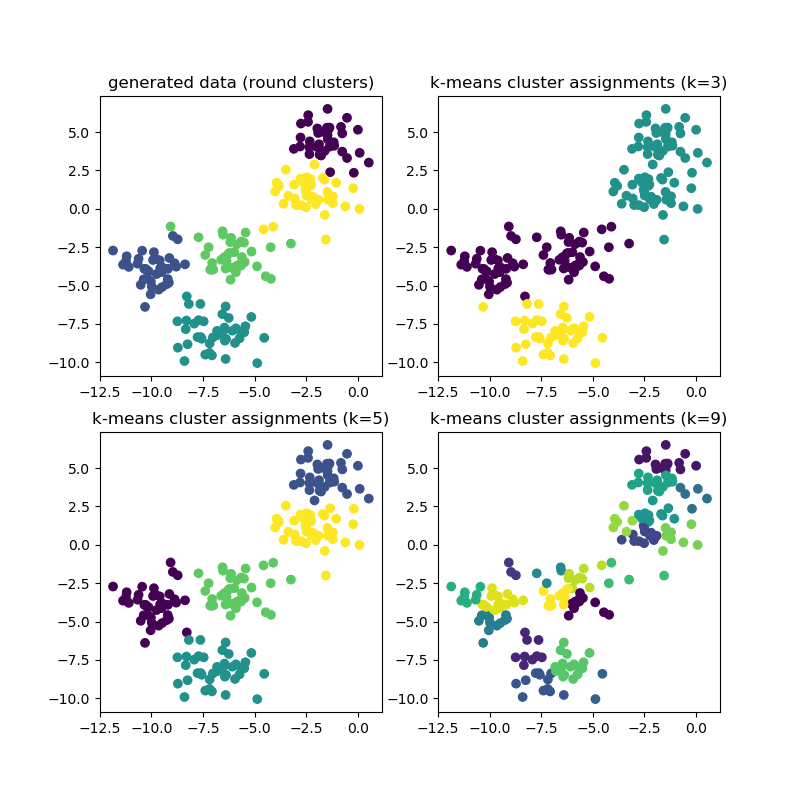

Text(0.5,1,'k-means cluster assignments (k=9)')

In [83]:
# create a large blank figure (sized 8x8 to have room for several sub-figures)
plt.figure(figsize=(8,8))

# add a "sub-figure"; the 221 means the full figure will be a 2x2 grid of
# sub-plots, and this is the 1st sub-plot
plt.subplot(221)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("generated data (round clusters)")

# run k-means with k=3
y_pred = KMeans(n_clusters=3).fit_predict(X)

# add another subplot; still a 2x2 grid, but this is the 2nd plot
plt.subplot(222)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("k-means cluster assignments (k=3)")

# re-run K-means with k=5 and then plot as the 3rd subfigure
y_pred = KMeans(n_clusters=5).fit_predict(X)
plt.subplot(223)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("k-means cluster assignments (k=5)")

# re-run K-means with k=9 and then plot as the 4rd subfigure
y_pred = KMeans(n_clusters=9).fit_predict(X)
plt.subplot(224)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("k-means cluster assignments (k=9)")

## Non-round clusters
Here, we apply a skew-like transform to stretch our clusters out along one axis; the result is non-round clusters (or "non-isotropic" to use the technical term).  We'll then plot the raw data and a k-means clustering with k=5.

<IPython.core.display.Javascript object>


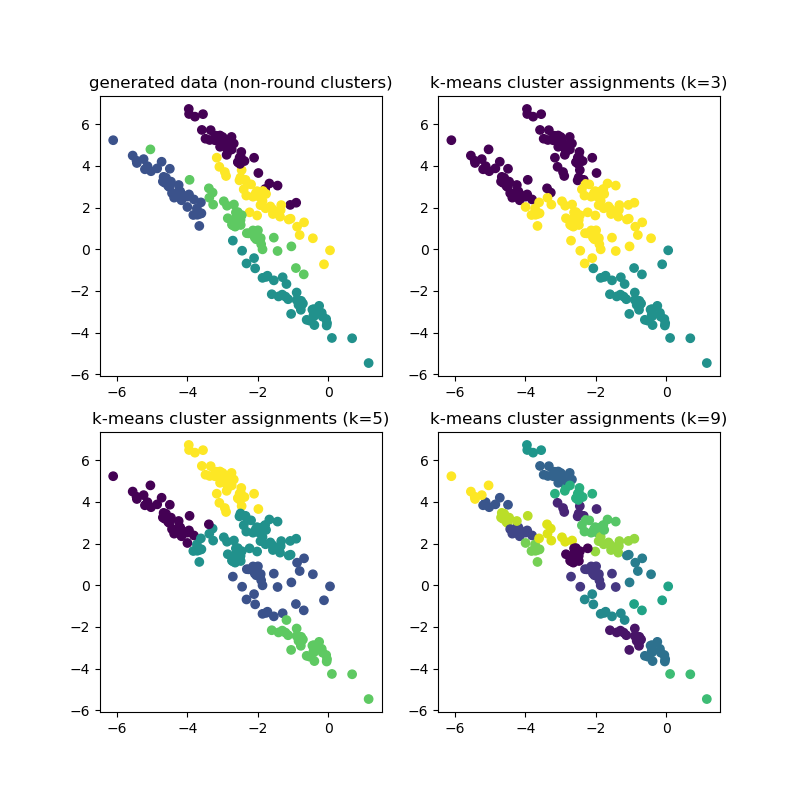

Text(0.5,1,'k-means cluster assignments (k=9)')

In [87]:
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
Z = np.dot(X, transformation)

# As before, make one large figure with 4 sub-figures
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.scatter(Z[:,0], Z[:,1], c=y)
plt.title("generated data (non-round clusters)")

y_pred = KMeans(n_clusters=3).fit_predict(Z)
plt.subplot(222)
plt.scatter(Z[:,0], Z[:,1], c=y_pred)
plt.title("k-means cluster assignments (k=3)")

y_pred = KMeans(n_clusters=5).fit_predict(Z)
plt.subplot(223)
plt.scatter(Z[:,0], Z[:,1], c=y_pred)
plt.title("k-means cluster assignments (k=5)")

y_pred = KMeans(n_clusters=20).fit_predict(Z)
plt.subplot(224)
plt.scatter(Z[:,0], Z[:,1], c=y_pred)
plt.title("k-means cluster assignments (k=9)")

## K-means vs Gaussian Mixture
Now, your job is to create a similar set of plots, but using a Gaussian Mixture Model instead of k-means to do the clustering.  You should have a total of 2 figures and a total of 6 sub-figures (really, it's exactly what we did above, but using GMM instead of K-means).  Note that you are *not* required to plot confidence bounds as ellipses (like we did for GMM with the iris data), just plot the cluster assignments (like we did in the previous cell).

<IPython.core.display.Javascript object>


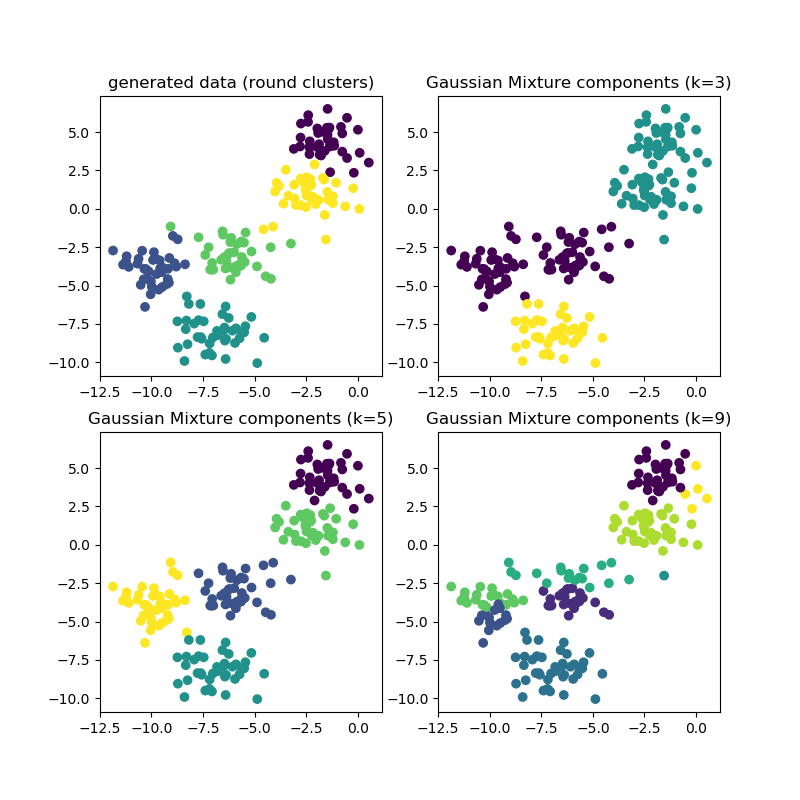

Text(0.5,1,'Gaussian Mixture components (k=9)')

In [85]:
#todo: plot the "round" clusters with GMM
# create a large blank figure (sized 8x8 to have room for several sub-figures)
plt.figure(figsize=(8,8))

# add a "sub-figure"; the 221 means the full figure will be a 2x2 grid of
# sub-plots, and this is the 1st sub-plot
plt.subplot(221)
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("generated data (round clusters)")

# run  GaussianMixture with k=3
gmm = GaussianMixture(n_components = 3, covariance_type = 'full')
gmm.fit(X)
y_pred = gmm.predict(X)


# add another subplot; still a 2x2 grid, but this is the 2nd plot
plt.subplot(222)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("Gaussian Mixture components (k=3)")

# re-run GaussianMixture with k=5 and then plot as the 3rd subfigure

gmm = GaussianMixture(n_components = 5, covariance_type = 'full')
gmm.fit(X)
y_pred = gmm.predict(X)

plt.subplot(223)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("Gaussian Mixture components (k=5)")

# re-run GaussianMixture with k=9 and then plot as the 4rd subfigure
gmm = GaussianMixture(n_components = 9, covariance_type = 'full')
gmm.fit(X)
y_pred = gmm.predict(X)
plt.subplot(224)
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("Gaussian Mixture components (k=9)")

<IPython.core.display.Javascript object>


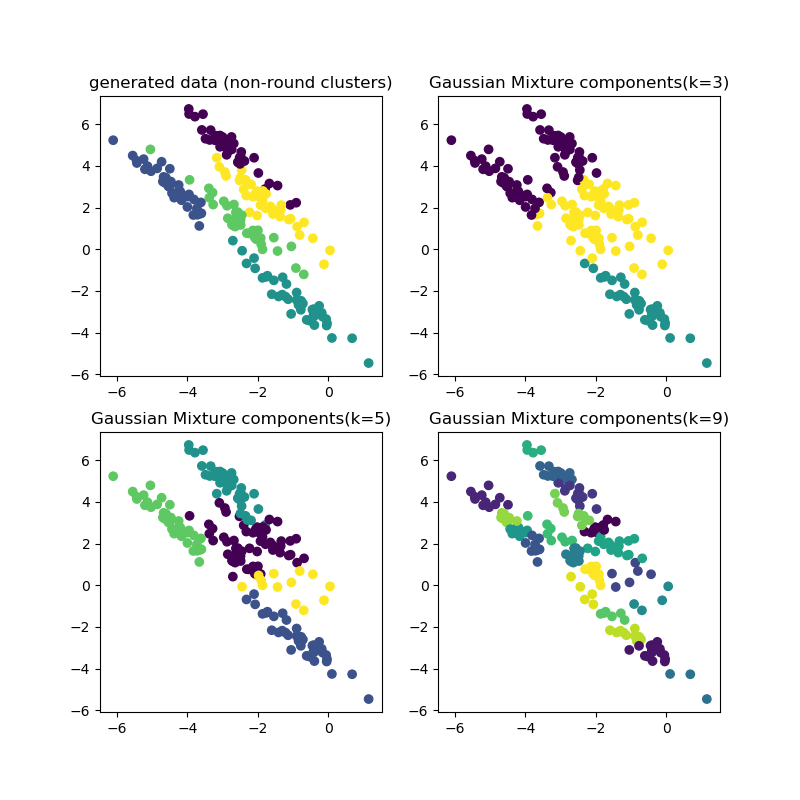

Text(0.5,1,'Gaussian Mixture components(k=9)')

In [86]:
#todo: plot the "stretched" clusters with GMM
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
Z = np.dot(X, transformation)

# As before, make one large figure with 4 sub-figures
plt.figure(figsize=(8,8))
plt.subplot(221)
plt.scatter(Z[:,0], Z[:,1], c=y)
plt.title("generated data (non-round clusters)")

gmm = GaussianMixture(n_components = 3, covariance_type = 'full')
gmm.fit(Z)
y_pred = gmm.predict(Z)
plt.subplot(222)
plt.scatter(Z[:,0], Z[:,1], c=y_pred)
plt.title("Gaussian Mixture components(k=3)")

gmm = GaussianMixture(n_components = 5, covariance_type = 'full')
gmm.fit(Z)
y_pred = gmm.predict(Z)
plt.subplot(223)
plt.scatter(Z[:,0], Z[:,1], c=y_pred)
plt.title("Gaussian Mixture components(k=5)")

gmm = GaussianMixture(n_components = 9, covariance_type = 'full')
gmm.fit(Z)
y_pred = gmm.predict(Z)
plt.subplot(224)
plt.scatter(Z[:,0], Z[:,1], c=y_pred)
plt.title("Gaussian Mixture components(k=9)")

# What do you notice?
Explain what you can conclude from examining these plots; describe both your conclusions about K-means and GMM, for the different types of data (round vs stretched), and for the different cluster sizes (e.g. how easy is it to tell what the "right" number of clusters is if you didn't krow ahead of time?)

Note: you may want to re-run these clusterings several times to examine any patterns that may occur in random-restarts


***I conclude that, based on the value of k both the algorithms create clusters from the given 5 clusters in two different shapes i.e.,rounded clusters or non-rounded clusters.
The way the clustering occurs in both the algorithms is almost the same.
In k means clustering, only rounded clusters seem to be efficient from my observations.
But in Gaussian mixture model both rounded and non rounded seem to be efficient from my observations. 

_todo: answer_

# Implement K-means yourself
Write your own implementation of the K-means algorithm below, and test it to demonstrate that it works correctly.  Note that since it is a randomized algorithm, you may not get exactly the same result as the sci-kit learn version, but if you run each several times (with different random seeds), you should see generally the same kind of results out of yours and theirs.

You can test your algorithm on the iris data and the synthetic data, and you can always generate extra synthetic datasets to test it on if you want.

In [79]:
# todo: implement k-means clustering
def Euclidean_distance(feat_one, feat_two):

    squared_distance = 0

    #Assuming correct input to the function where the lengths of two features are the same

    for i in range(len(feat_one)):

            squared_distance += (feat_one[i] - feat_two[i])**2

    return squared_distance


def kmeans(irisdata, k):
    centers=[]
    for i in range(k):
        centers.append(irisdata[i])
            
    while True:
        
        x=[[] for _ in range(k)]
        y=[[] for _ in range(k)]
        classification=[]
        
        #print(centers)
        #clusterasst=[0 for i in range(len(irisdata))]
        for i in range(len(irisdata)):
            dists = []
            #best = float('inf')
            for j in range(k):
                dist = Euclidean_distance(irisdata[i], centers[j])
                dists.append(dist)
            #print(dists.index(min(dists)))
            classification.append(dists.index(min(dists))) 
        for i in range(len(irisdata)):
            x[classification[i]].append(irisdata[i][0])
            y[classification[i]].append(irisdata[i][1])

        next_centers = [0]*k
        for i in range(k):
            s=sum(x[i])/classification.count(i)
            s1=sum(y[i])/classification.count(i)
            next_centers[i] = [s, s1]
        #print(next_centers, "==", centers)
        if np.all(centers == np.array(next_centers)):
            break
        centers=next_centers

    return centers, classification


<IPython.core.display.Javascript object>


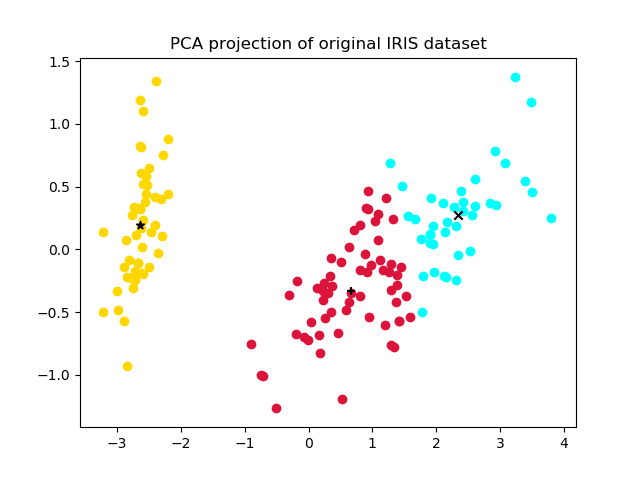

Text(0.5,1,'PCA projection of original IRIS dataset')

In [80]:
# todo: test k-means clustering
centers, classifications = kmeans(iris2d,3)         


plt.figure()

colors = ['cyan', 'crimson', 'gold']
for i in range(len(iris2d)):
    plt.scatter(iris2d[i][0], iris2d[i][1], color=colors[classifications[i]])

markers = ['x', '+', '*']
for i in range(len(centers)):
    plt.scatter(centers[i][0], centers[i][1], marker=markers[i], color='black')

plt.title('PCA projection of original IRIS dataset')

<IPython.core.display.Javascript object>


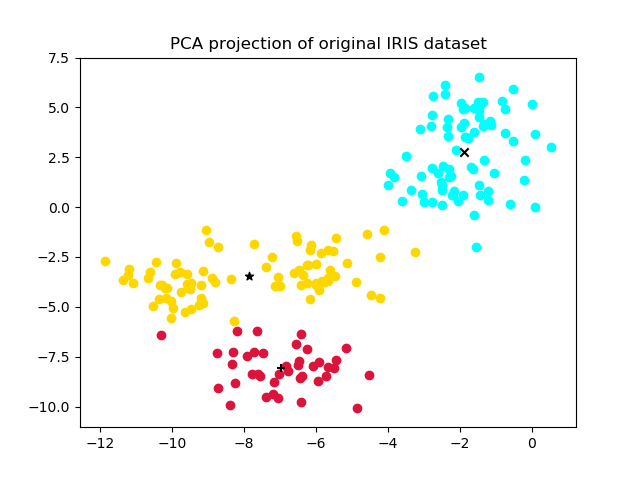

Text(0.5,1,'PCA projection of original IRIS dataset')

In [82]:
#using synthetic data
(X, y) = datasets.make_blobs(centers=5,  n_samples=200, n_features=2, random_state=1)
centers, classification = kmeans(X, k=3)
plt.figure()

colors = ['cyan', 'crimson', 'gold']
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], color=colors[classification[i]])

markers = ['x', '+', '*']
for i in range(len(centers)):
    plt.scatter(centers[i][0], centers[i][1], marker=markers[i], color='black')

plt.title('PCA projection of original IRIS dataset')